# Linear Regression

In this notebook, we will use linear regression to infer properties about a planet like an astronomer would. The term "Linear Regression" is just a fancy way of saying "solving a linear system of equations."

In [ ]:
# We will load CSV data and plot it, so we need these two packages
import CSV
using Plots
gr(legend=false);

## Warm-up & Review
Consider this system of equations which is similar to those we looked at in lecture
$$
x_1 + x_2 + 2x_3 = 7 \\
2x_1 - 6x_2 - x_3 = 3 \\
x_1 + 2x_3 = 4
$$
We can write this system in matrix form like this:
$$
\begin{bmatrix}
1 & 1 & 2 \\
2 & -6 & -1 \\
1 & 0  & 2
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix}
=\begin{bmatrix}
7\\
3\\
4
\end{bmatrix}
$$
In this form, we can have Julia solve it for us!

In [ ]:
A = [1 1 2; 2 -6 -1; 1 0 2]
y = [7; 3; 4]
# We solve for x with the backslash operator
A\y

In this notebook we will use Julia to solve very large systems of equations.

## Example 1: Object dropped on unknown planet
In this example, we will take some data and try to estimate the equation that created it.
The csv file "gravity.csv" contains samples of an objects position as it falls under the influence of gravity on an unknown planet. It will be your job to determine the strength of gravity from the data and then identify the planet.

Because real position sensors are imperfect, there is error in the measured positions. We generally refer to this as "noise" in the data. If you have ever tried to use GPS inside a building or parking structure and seen your dot bounce all over the place, then you have observed this positional noise.

In [ ]:
# Here we load our data from a CSV file
data = CSV.File("gravity.csv")
t = data.t
y_measured = data.y;

In [ ]:
# Step 1
# The first step of data analysis is to explore the data your are given
# What is the range of the y_measured data?
# How many samples are there in t and in y_measured?
# How often are the samples collected?
# you may need functions such as maximum(), minimum(), length()
??

In [ ]:
# Step 2
# An important part of data exploration is visualization
# the scatter function plots distinct data points
# it easy to see this data has a lot of positional noise!
scatter(??, ??, title="Measured Falling Object Positions", ylabel="Height (m)", xlabel="Time (s)")

Physics tells us that an object falling under the influence of gravity will obey the following equation:
$$ \Large x_1 - x_2\frac{t^2}2 = y$$
where "$y$" is the height at time "$t$", "$x_1$" is the initial height of the object, and "$x_2$" is the acceleration due to gravity on the planet. We know the measured "$y$" at various times "$t$", but we want to estimate the initial height "$x_1$" and the strength of gravity "$x_2$".

In [ ]:
# Step 3
# Create the left-hand side of the equation in Julia using x1, x2 and t
# Hint: because t is a vector of values, you will need dot operations like .-, .^, etc.
f(x1, x2) = ??

# When you write a function, its good practice to make sure it runs!
y_test = f(100, 9.81)
@assert size(y_test) == size(y_measured)

For each value of "$y$" and "$t$", we have a different version of the above equation we can use to solve for $x_1$ and $x_2$. Thus, the above equation (we call this our physics "model") and our data points form a system of equations!
$$
x_1 - x_2 \frac{0.00^2}{2} = 103.644 \\
x_1 - x_2 \frac{0.05^2}{2} = 102.569 \\
x_1 - x_2 \frac{0.10^2}{2} = 105.298 \\
x_1 - x_2 \frac{0.15^2}{2} = 98.8994 \\
\vdots \\
x_1 - x_2 \frac{6.90^2}{2} = 9.1762 \\
x_1 - x_2 \frac{6.95^2}{2} = 11.7289 \\
x_1 - x_2 \frac{7.00^2}{2} = 4.11701 \\
$$
Our system of equations has two unknowns (initial height and gravity) and many more equations (one for each data point). We cannot solve this system of equations by hand, but Julia can help us! In order for Julia to understand our system of equations, we need to write our system of equations as a matrix like this:

$$
{\Large Ax=y}\\
\begin{bmatrix}
1 & - \frac{0.00^2}{2} \\
1 & - \frac{0.05^2}{2} \\
1 & - \frac{0.10^2}{2} \\
1 & - \frac{0.15^2}{2} \\
\vdots & \vdots \\
1 & - \frac{6.90^2}{2} \\
1 & - \frac{6.95^2}{2} \\
1 & - \frac{7.00^2}{2}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
103.644 \\
102.569 \\
105.298 \\
98.8994 \\
\vdots\\
9.1762 \\
11.7289 \\
4.11701
\end{bmatrix}
$$
We have a column of 1's because their is no value in front of each $x_1$, so that is the same as having a 1 multiplying each $x_1$. The second column are the values multiplying $x_2$ in our equations (We interpret substraction as being the same as multiplying by -1). 

In [ ]:
# Step 4
# Lets form our A matrix
A = [ones(size(t)) -t.^2/2]
# Another way to form our A matrix is to use our "f" function like this:
# A = [f(1,0) f(0,1)]
# Think about your "f" function and why these are equivalent
A

In [ ]:
# Step 5
# Now that we have the A matrix and y vector, 
# we can solve the system of equations in Julia with the backslash operator
height, gravity = ??\??;
println("""
estimated height = $height
estimated gravity = $gravity
""")

In [ ]:
# Step 6
y_estimate = f(??, ??)
scatter(t, y_measured)
plot!(??, ??, linewidth=5, ylabel="Height", xlabel="Time", title="Best Fit")

Based on your estimated value of gravity, what planet is the object falling on? Use the following table to determine the planet.

Body    | Radius [m]  | Acceleration Due to Gravity, "g" [m/s²]
--------|-------------|--------
Sun     | 6.96 x 10^8 | 274.1
Mercury | 2.43 x 10^6 | 3.6  
Venus   | 6.06 x 10^6 | 8.9  
Earth   | 6.38 x 10^6 | 9.8  
Moon    | 1.74 x 10^6 | 1.6  
Mars    | 3.37 x 10^6 | 3.8
Jupiter | 6.99 x 10^7 | 26.0
Saturn  | 5.85 x 10^7 | 11.1  
Uranus  | 2.33 x 10^7 | 10.7 
Neptune | 2.21 x 10^7 | 14.1 
Pluto   | 1.50 x 10^6 | 0.42  

$\tiny \text{Source: http://www.aerospaceweb.org/question/astronomy/q0227.shtml}$

Scientists are able to measure the radius of planets using telescopes and they estimate the acceleration due to gravity from data just like you just did. Using the radius of the planet and the gravity, we can estimate the mass of the planet without having to visit the planet! The three are related by the following equation:
$$
\Large g = G \frac{m}{r^2}
$$
where "$g$" is the acceleration due to gravity (we called it $x_1$ above), "$m$" is the unknown mass (in kg), "$r$" is the radius (from the table above), and "$G$" is the "universal gravitation constant" which equals $6.673\times10^{-11}$.

In [ ]:
# What is the mass of the planet you are observing? solve for "m" in the above equation
G = 6.673*10^-11
??

Wow! that's pretty massive!

## Example 2: Object launched from Volcano

Let's try linear regression to solve a slightly different problem. You are collecting data on another unknown planet and observe the positions of a rock that was launched from an active volcano on the planet. We will use linear regression to estimate the height of the volcano, the strength of gravity, and the initial vertical velocity of the rock when it was launched from the volcano.

This problem is similar to the problem we just solved, so if you get stuck on any step, refer to the same step in the previous example to get an idea of what to do.

We will use the data from "volcano.csv" and use the following physical model for the motion of the rock:
$$ \Large x_1 - x_2\frac{t^2}2 + x_3 t= y$$
where, again, "$y$" is the height at time "$t$", "$x_1$" is the initial height of the rock (the height of the volcano), "$x_2$" is the acceleration due to gravity on the planet, and "$x_3$" is the initial vertical velocity. We will use the measured "$y$" at various times "$t$" to estimate the initial height "$x_1$", the strength of gravity "$x_2$", and the launch speed "$x_3$". Notice that this equation is very similar to the one from the previous example, but now we have an initial launch speed included.


In [ ]:
# load our data from a CSV file
data = CSV.File("volcano.csv")
t = data.t
y_measured = data.y;

In [ ]:
# Step 1: explore the new data
# What is the range of the y_measured data?
# How many samples are there in t and in y_measured?
# How often are the samples collected?
# you may need functions such as maximum(), minimum(), length()
??

In [ ]:
# Step 2: plot your data using scatter
scatter(??, ??, title="Measured Launched Object Positions", ylabel="Height (m)", xlabel="Time (s)")

In [ ]:
# Step 3: Create our physical model
# Create the left-hand side of the equation in Julia using x1, x2 and t
# Hint: because t is a vector of values, you will need dot operations like .-, .^, etc.
f(x1, x2, x3) = ??

# Let's make sure it runs!
y_test = f(100, 9.81, 10)
@assert size(y_test) == size(y_measured)

In [ ]:
# Step 4: Create your system of equations matrix A
# this first column is the x1 coefficients
# the second column is the x2 coefficients
# the third column is the x3 coefficients
# Hint: the first two columns can be created the same way as the previous example
A = [?? ?? ??]
A

In [ ]:
# Step 5: Solve the system of equation with the backslash operator
height, gravity, velocity = ??;
println("""
estimated height = $height
estimated gravity = $gravity
estimated velocity = $velocity
""")

In [ ]:
# Step 6: Plot the estimate with the data
y_estimate = f(??, ??, ??)
scatter(t, y_measured)
plot!(??, ??, linewidth=5, ylabel="Height", xlabel="Time", title="Best Fit")

What planet is this volcano on? Use the estimate acceleration due to gravity and the table above. In 2020, scientists discovered that this planet has at least 37 active volcanos! Using your estimate of gravity and the given radius in the table above, estimate the mass of this planet.

In [ ]:
G = 6.673*10^-11
??

In [ ]:
# Which of the two planets is more massive? By how much?
??

In this notebook, we have explored linear regression to model different forms of falling objects. The applications of linear regression are much broader! Any discipline which collects data that it wants to understand better or use to make predictions will use linear regression. It is an essential tool in any data analysis toolbox. It is used to fit weather trends to predict future rainfall. It is used to model stock prices and oil prices. It is used in epidemiology, finance, biology, economics, finance, and machine learning. "[It ranks as one of the most important tools used in these disciplines.](https://en.wikipedia.org/wiki/Linear_regression#Applications)"

# Extra: Motion in 1D, How acceleration, velocity, and position are connected
## Numerical Finite-Differences

We were able to use the collected data to estimate the true positions of the objects as they fall. Let's use the estimated positions from the previous example to determine the objects velocity and acceleration as a function of time. 

The (average) velocity is the change in position divided by the change in time:
$$
v = \frac{\Delta y}{\Delta t}
$$
Similarly, the (average) acceleration is the change in velocity divided by the change in time:
$$
a = \frac{\Delta v}{\Delta t}
$$
We can compute these values over the timesteps given in Julia!

In [7]:
# To do this numerically, we want a small timestep to avoid errors, 
# so we sample our physical model every 0.001 seconds.
# We use the height, gravity, and velocity from the previous example.
t = 0:0.001:15
y = height .- gravity*t.^2/2 .+ velocity*t

v = diff(y)./diff(t)

a = ?? ./diff(t[1:end-1]);

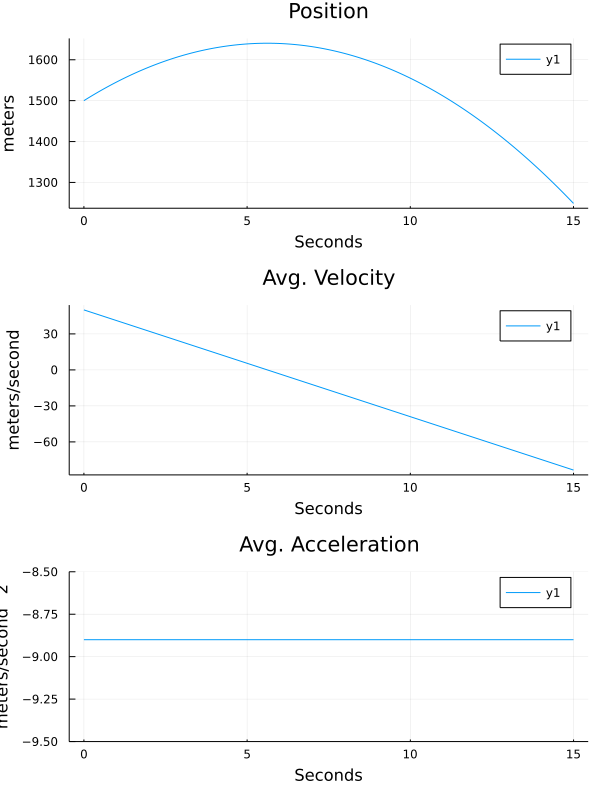

In [8]:
y_plt = plot(t, y, title="Position", xlabel="Seconds", ylabel="meters")
v_plt = plot(t[1:length(v)], v, title="Avg. Velocity", xlabel="Seconds", ylabel="meters/second")
a_plt = plot(t[1:length(a)], a, title="Avg. Acceleration", xlabel="Seconds", ylabel="meters/second^2", ylim=(-9.5,-8.5))
plot(y_plt, v_plt, a_plt, layout=(3,1), size=(600,800))

A positive velocity means the object is moving up, while a negative velocity means the object is moving down. Find the point on the graph where the velocity is equal to zero. What do you notice on the position graph at that same time? The acceleration is constant because gravity is constant, and it is negative because it makes objects move faster down (i.e. have a greater negative velocity).

## Numerical Integration
In the previous example, we started with the known positions and were able to approximate the velocity and the acceleration. Sometimes we start with the acceleration and we want to plot the position over time. For example, if you are designing a rocket, you may know the thrust the rocket can produce over a given span of time and want to determine how high it will fly.

If we have a velocity of 8 m/s, then after 2 seconds we will have traveled 16 meters, i.e. we multiply the velocity and the timestep to get the change in position. The current position is then the previous position plus the change.
Mathematically, we write:
$$
y[i] = \sum_1^i v[i]\Delta t
$$
And similarly, for acceleration:
$$
v[i] = \sum_1^i a[i]\Delta t
$$
In Julia, we can perform the cumulative sum operation ($\sum_1^i$) with the `cumsum` function!
Let's apply this to a rocket taking off and see how high it will fly.

In [9]:
gravity = 9.81 # meters/second^2
thrust = 10 # meters/second^2

# Create our acceleration vector
# we apply 3x thrust for 2 seconds
# then we apply 1x thrust for 3 seconds
# then we have no thrust left and only gravity is left
t = 0:0.01:15
accel = -gravity*ones(length(t))
accel[1:200] .+= 3*thrust
accel[201:500] .+= thrust

# Obtain velocity from the acceleration, Δt = 0.01
vel = cumsum(accel)*0.01

# Now apply the same operation to the velocity to obtain the position
pos = ??;

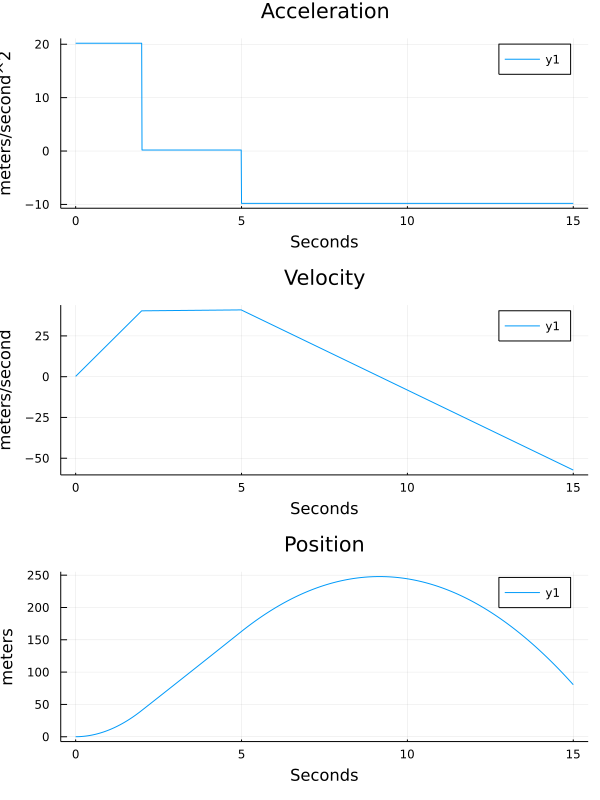

In [10]:
a_plt = plot(t, accel, title="Acceleration", xlabel="Seconds", ylabel="meters/second^2")
v_plt = plot(t, vel, title="Velocity", xlabel="Seconds", ylabel="meters/second")
x_plt = plot(t, pos, title="Position", xlabel="Seconds", ylabel="meters")
plot(a_plt, v_plt, x_plt, layout=(3,1), size=(600,800))

In [11]:
# What is the maximum position reached?
??

247.84415700000073

A more exact way of computing these functions is given in a Calculus class, under the topics of differentiation and integration. In this section, we approximated these functions numerically (i.e. with a computer). While these functions were relatively simple, there are often functions in real applications that are too complex to use calculus techniques and must resort to numerical methods like those shown above.